# What's your pet ?( fast.ai Practical Deep Learning for Coders, v3)

Be sure to check more lessons/tutorials at https://course.fast.ai 

Start with **Azure DataScience VM** (gpu, free trial)
- https://course.fast.ai/start_azure.html

Start in **Google Colab (one click, free GPU/TPU)**
- https://github.com/fastai/course-v3/tree/master/nbs/dl1
- https://course.fast.ai/start_colab.html

Start in ** binder (note-cpu only, *slow*) one click ** 
- https://mybinder.org/v2/gh/DevScope/ai-lab/master?filepath=notebooks%2Ffastai%2Ffastai-mnist-sample.ipynb

More options at https://course.fast.ai/

Note: this version was stripped out of important notes for live demos, be sure to check the full version at fast.ai  
- https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb

# Notebook Settings/Autoreload & Libs

In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
from fastai.vision import *
from fastai.metrics import error_rate

# About the cats & dogs breeds dataset


We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features **12 cat breeds and 25 dogs breeds**. 

Our model will need to learn to differentiate between these **37 distinct categories**. According to their paper, the best **accuracy they could get in 2012 was 59.21%,** using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. 

Let's see how accurate we can be using deep learning!


# Loading and inspecting data with fast.ai lib

In [27]:
path = untar_data(URLs.PETS); path.ls()

[PosixPath('/home/devadmin/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/devadmin/.fastai/data/oxford-iiit-pet/images')]

In [28]:
fnames = get_image_files(path/'images')
fnames[:5]

[PosixPath('/home/devadmin/.fastai/data/oxford-iiit-pet/images/havanese_123.jpg'),
 PosixPath('/home/devadmin/.fastai/data/oxford-iiit-pet/images/american_bulldog_143.jpg'),
 PosixPath('/home/devadmin/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_186.jpg'),
 PosixPath('/home/devadmin/.fastai/data/oxford-iiit-pet/images/pug_102.jpg'),
 PosixPath('/home/devadmin/.fastai/data/oxford-iiit-pet/images/boxer_125.jpg')]

In [29]:
filename_patttern = re.compile(r'/([^/]+)_\d+.jpg$')
str(fnames[1]),re.findall(filename_patttern,str(fnames[1]))

('/home/devadmin/.fastai/data/oxford-iiit-pet/images/american_bulldog_143.jpg',
 ['american_bulldog'])

In [30]:
data = ImageDataBunch.from_name_re(path/'images', fnames, filename_patttern,
                                   ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

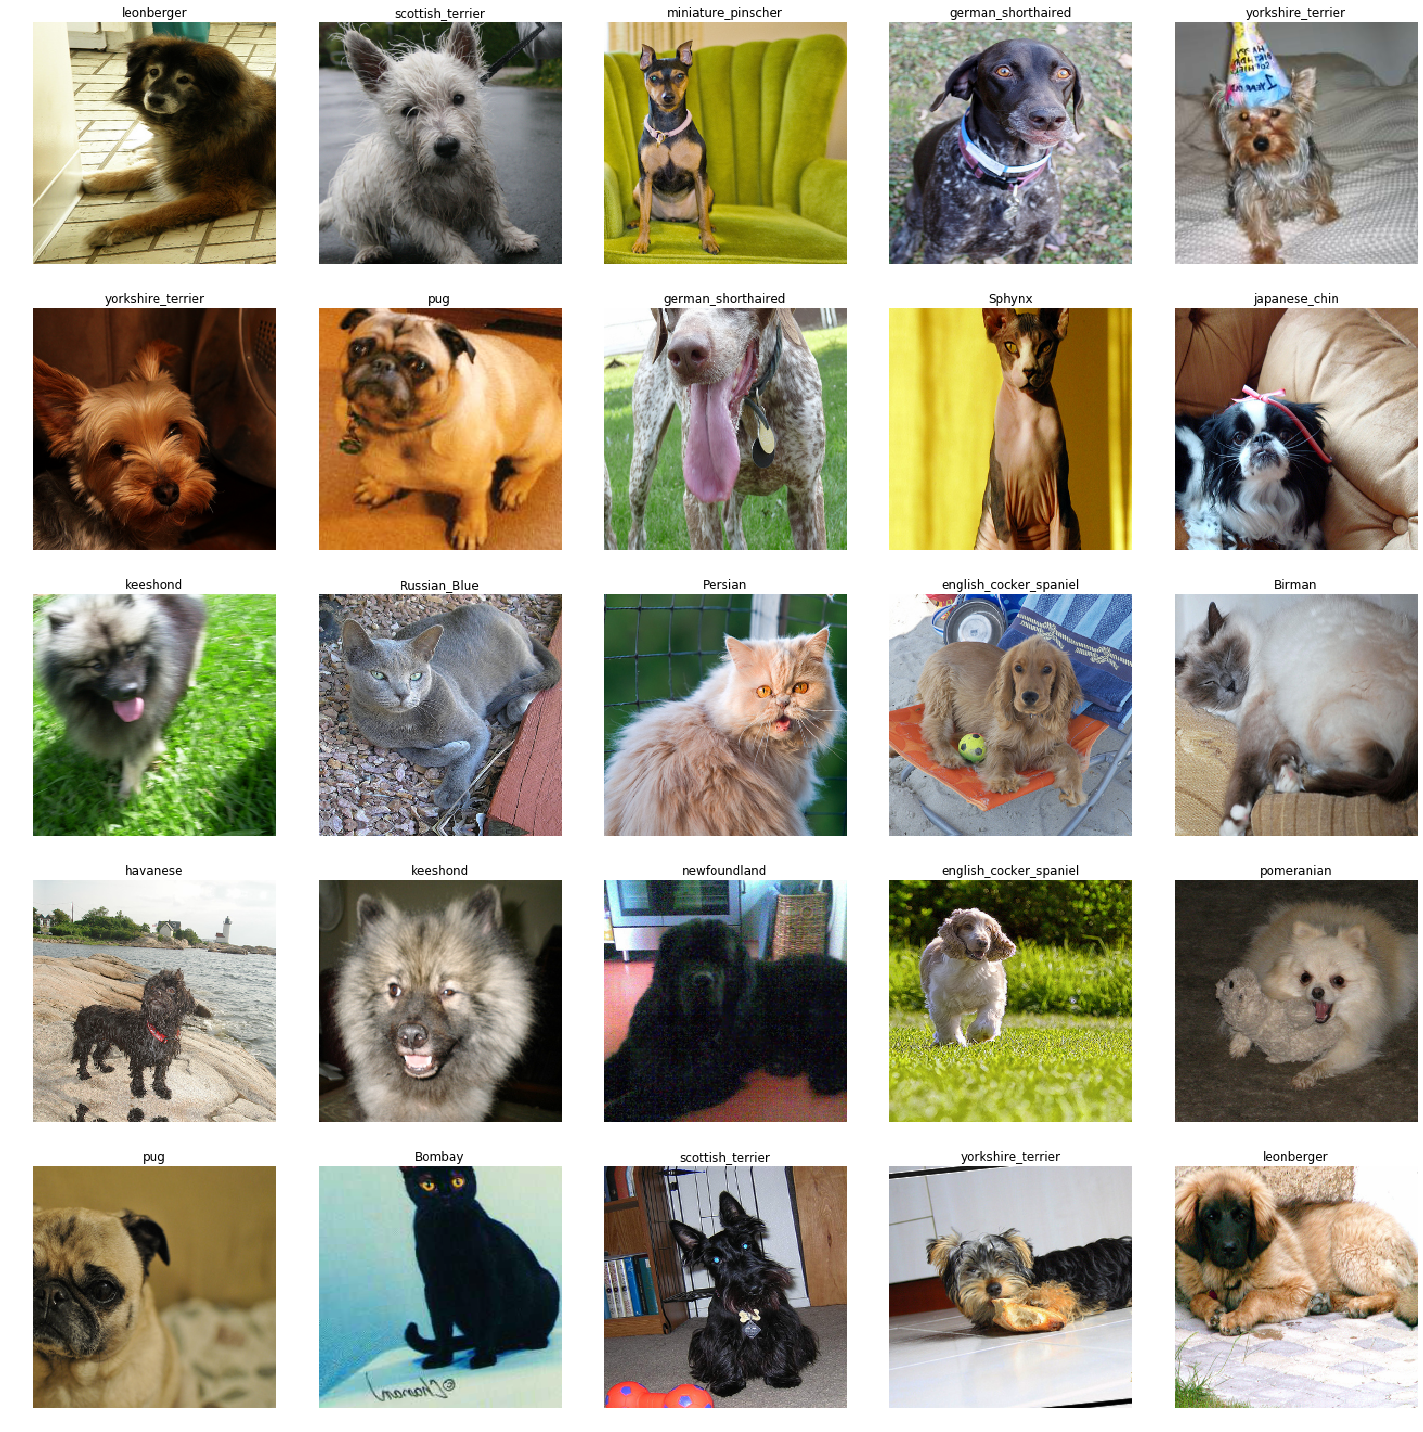

In [31]:
data.show_batch()

# Training, using resnet34 pretrained model (transfer learning)

In [32]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [33]:
learn.fit_one_cycle(2)

# Results

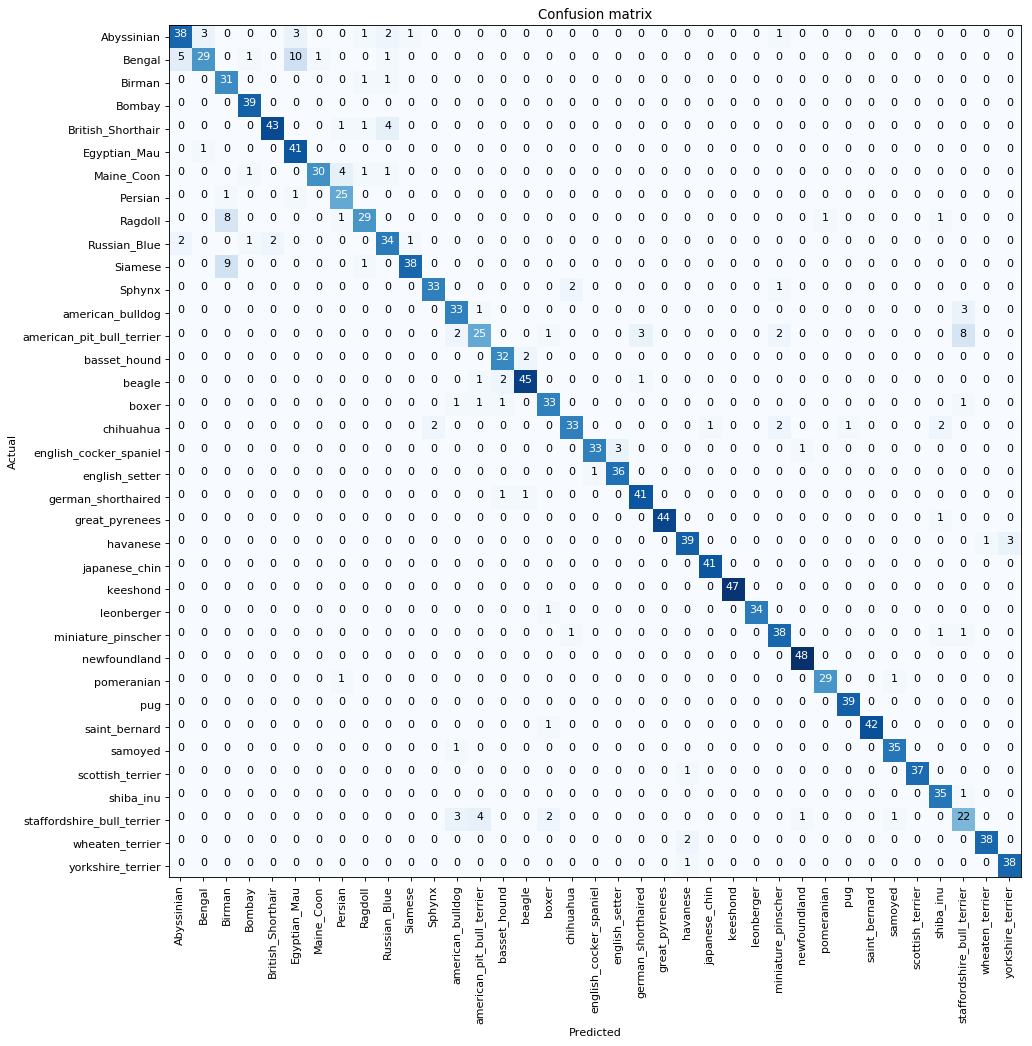

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(13,13), dpi=80)

In [23]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('Birman', 'Ragdoll', 5),
 ('boxer', 'american_bulldog', 5),
 ('Bengal', 'Abyssinian', 4),
 ('Russian_Blue', 'Bombay', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('Sphynx', 'chihuahua', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('havanese', 'yorkshire_terrier', 3)]

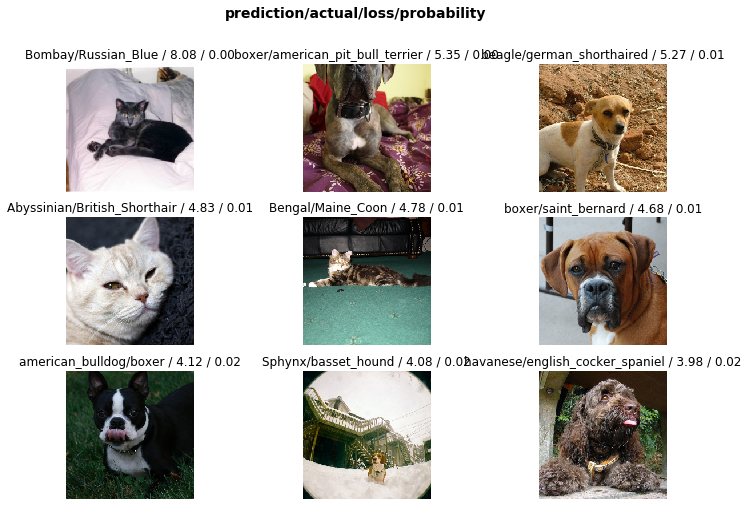

In [24]:
interp.plot_top_losses(9, figsize=(12,8))

Done!